<div style="text-align:center; border-radius:15px; padding:15px; color:#FFC0CB; margin:0; font-size:150%; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><b>Unveiling the Secrets of Housing Prices</b></div>


## Table of Contents
- [Introduction](#Introduction)
- [Data Exploration](#Data-Exploration)
- [Data Visualization](#Data-Visualization)
- [Feature Engineering](#Feature-Engineering)
- [Model Building](#Model-Building)
- [Model Evaluation](#Model-Evaluation)
- [Conclusion and Future Work](#Conclusion-and-Future-Work)

## Introduction
In this notebook, we will explore a dataset containing various features of houses and their corresponding prices. Our goal is to understand the relationships between these features and the price, and to build a predictive model that can estimate the price of a house given its features.

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

## Data Exploration
Let's load the dataset and take a look at the first few rows to understand its structure.

In [5]:
# Load the dataset
file_path = '/content/real_estate_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


Let's check for any missing values and get a summary of the dataset.

In [6]:
# Check for missing values
df.isnull().sum()

,0
ID,0
Square_Feet,0
Num_Bedrooms,0
Num_Bathrooms,0
Num_Floors,0
Year_Built,0
Has_Garden,0
Has_Pool,0
Garage_Size,0
Location_Score,0


In [7]:
# Get a summary of the dataset
df.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


## Data Visualization
Let's visualize the relationships between different features and the price using various plots.

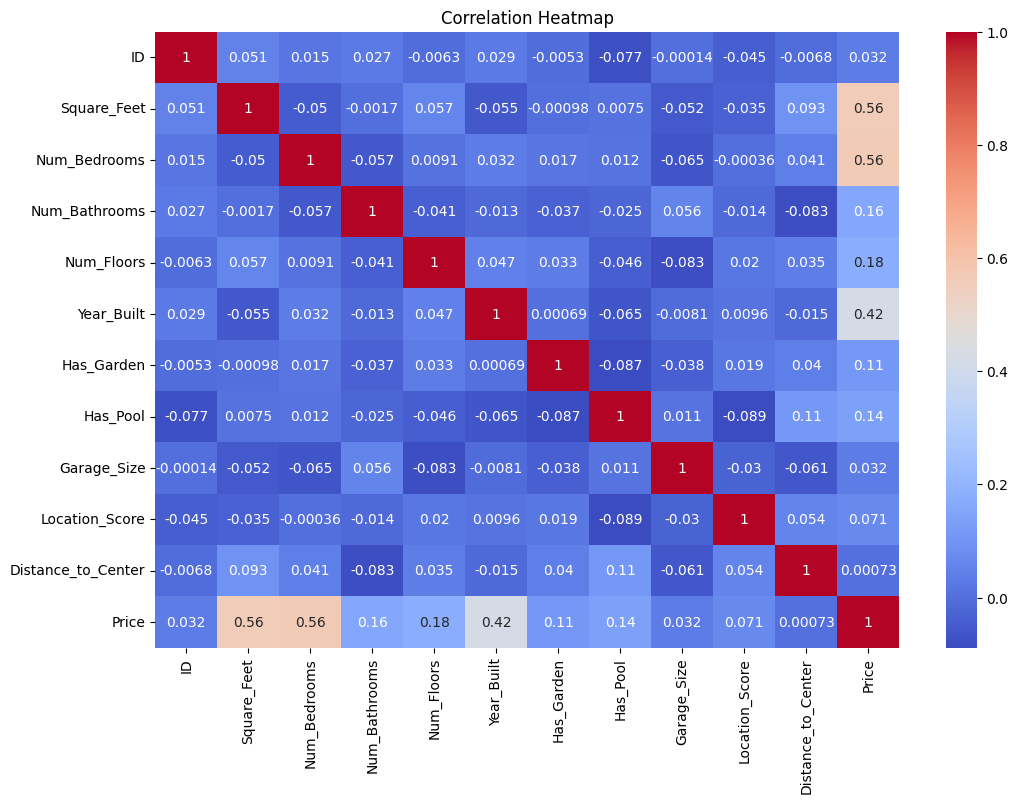

In [8]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

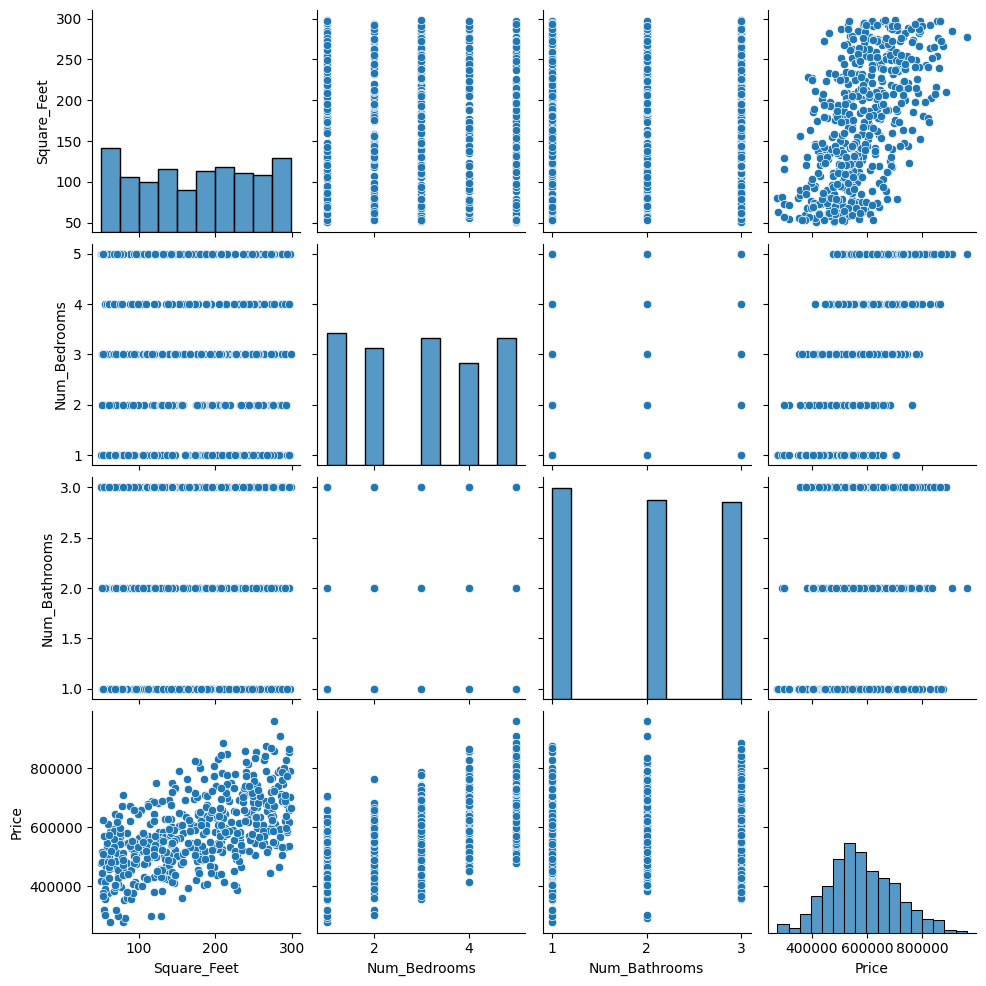

In [9]:
# Pair plot
sns.pairplot(df[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Price']])
plt.show()

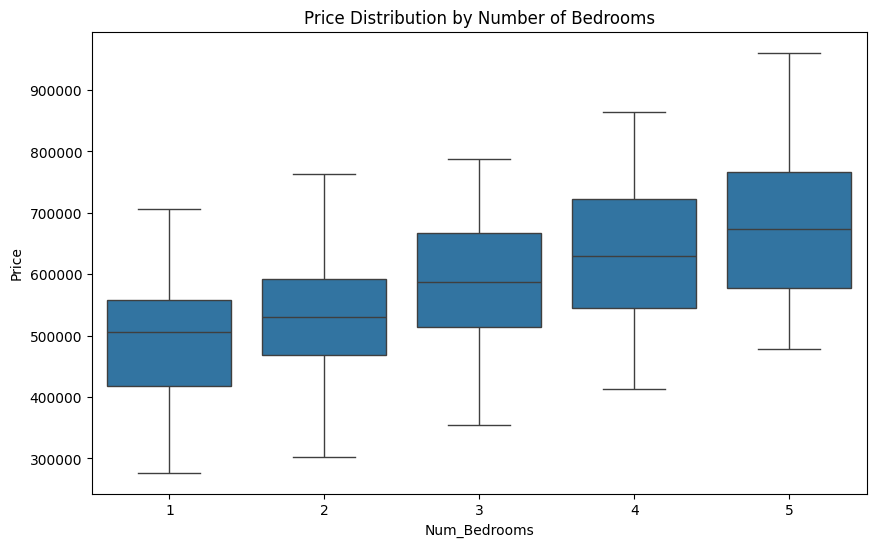

In [11]:
# Box plot for Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Num_Bedrooms', y='Price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.show()

## Feature Engineering
Before building our model, let's perform some feature engineering to enhance our dataset.

In [12]:
# Create a new feature: Age of the house
df['House_Age'] = 2023 - df['Year_Built']

# Drop the Year_Built column
df.drop('Year_Built', axis=1, inplace=True)

## Model Building
Let's build a linear regression model to predict the price of a house.

In [13]:
# Define features and target variable
X = df.drop(['ID', 'Price'], axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation
Let's evaluate the performance of our model using the test data.

In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(437730359.7082724, 0.970899139169718)

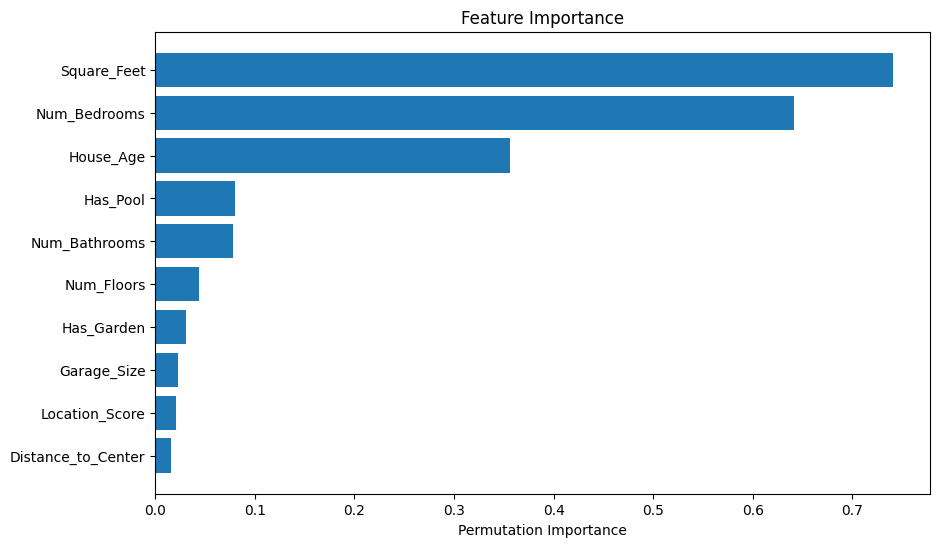

In [15]:
# Permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()